# ELE510 Image Processing and Computer Vision: LAB, Exercise  10, Real-world Computer Vision Applications.

**Purpose:** *To play around with some real-word CV applications using PyTorch.*

The theory for this exercise can be found in the compendium [1]. See also the following documentations for help:
- [numpy](https://numpy.org/doc/stable/)
- [matplotlib](https://matplotlib.org/stable/users/index.html)
- [pytorch](https://pytorch.org/)
- [torchvision](https://pytorch.org/vision/stable/index.html)

<div class="alert alert-block alert-info">
Please, make sure that you have previously installed all the packages contained in the `requirements.txt` file.
</div>

**Approval:**
<div class="alert alert-block alert-success">
The current notebook should be submitted on CANVAS as a single PDF file. Read the `ELE510_Getting_started.pdf` file for more information.
</div>

### Note regarding the notebook

- In this assignment, you will make use of some of the pretrained models for computer vision applications provided by PyTorch.
  
- The `torchvision` package consists of popular datasets, model architectures, and common image transformations for computer vision.
 
- No model training is required. You will only perform inference (prediction).

- For loading the images, **please make use of the `read_image()` function from `torchvision`**. It will automatically load the image as a `Tensor` and with the $(C, H, W)$ convention.
  
- You will find placeholders marked with `...` throughout the code. Your task is to replace each `...` with the appropriate code. Ensure that each placeholder is properly filled in to complete the implementation.

- The theoretical questions have to be answered directly on the notebook using the *Markdown* cells marked as **Answer here**. LaTex commands (if relevant) are available using the command `$...$`.

### Some theory

Throughout the assignment, we will mainly use a type of CNN called [ResNet](https://paperswithcode.com/method/resnet) (Residual Networks). The key innovation in ResNet is the introduction of residual blocks, which allow the model to learn residual functions with reference to the layer inputs, rather than learning unreferenced functions.

![ResNet](./images/images/Resnet.png)

We will not deepen too much in how ResNet works, but just for you to know that these types of network are easier to optimize, and can gain accuracy from considerably increased depth. There are multiple ResNet versions depending on the depth of the model (i.e., ResNet-50 contains 50 layers) and the task to solve (classification, segmentation, detection, ...). We will see some of them in this assignment.

### Load main packages

In [1]:
import torch
import torchvision.transforms as T
from torchvision.io import read_image
import numpy as np
import matplotlib.pyplot as plt

## Problem 1. Image Classification

Image Classification involves assigning a label to an entire image based on its content. This process uses a trained model to analyze the features of an image and predict the category it belongs to. The classification result is a single label per image, without specifying locations or boundaries of objects within the image.

**a)** First of all, let's implement a function to compute inference. You will use it in the following problems. The function works as follow:
- Receive as inputs a `Tensor` image, a CNN architecture, and the pretrained weights.
- Load the model with the pretrained weights and set *evaluation* mode.
- Load the same image transformations the model was trained with the `transforms()` method and apply them to the image. 
- Perform inference and return the predictions.

In [2]:
def compute_inference(image, arch, weights):
    
    # Initialize model with the pretrained weights and in evaluation mode
    model = arch(weights=weights)
    model.eval()
    
    # Initialize the image transforms as in the pretrained weights.
    preprocess = weights.transforms()
    
    # Apply inference preprocessing transforms
    batch = preprocess(image).unsqueeze(0) # Add batch dimension
    
    # Perform inference
    with torch.no_grad():
        predictions = model(batch)

    return predictions


**b)** We saw an example of image classification in Assignment 9, where we were using a custom CNN model with around 6k parameters and with two categories (cat or not-cat) to classify. In this case, you will use the `resnet50` model pretrained with the [ImageNet dataset](https://www.kaggle.com/c/imagenet-object-localization-challenge/overview/description), which contains **up to 1000 categories**.

Run inference on the `ballon`, `car_wheel` and `snail` images with this pretrained model and show the classification results. Use the `ResNet50_Weights.DEFAULT` weights. 

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to C:\Users\Ali Khan/.cache\torch\hub\checkpoints\resnet50-11ad3fa6.pth


100.0%


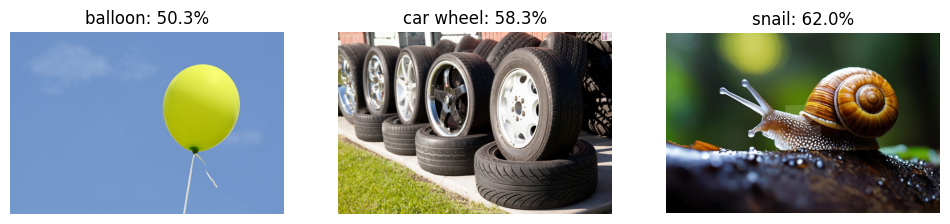

In [5]:
from torchvision.models import resnet50, ResNet50_Weights

list_imgs = ['ballon.jpg', 'car_wheel.jpg', 'snail.jpg']

plt.figure(figsize=(12,20))
for i, img_str in enumerate(list_imgs):

    # Read the image
    image_path = f"./images/images/{img_str}"
    img = read_image(image_path)

    # Inference
    prediction = compute_inference(image=img, 
                                   arch=resnet50, 
                                   weights=ResNet50_Weights.DEFAULT)

    # Postprocess the output
    output = prediction.squeeze(0).softmax(0)
    
    class_id = output.argmax().item()
    score = output[class_id].item()
    category_name = ResNet50_Weights.DEFAULT.meta["categories"][class_id]

    # Display results
    img_np = img.permute(1, 2, 0)
    plt.subplot(1, 3, i+1), plt.imshow(img_np), plt.title(f"{category_name}: {100 * score:.1f}%"), plt.axis('off')

plt.show()    

**Expected Output**

```
Ballon: 50.3%
Car Wheel: 58.3%
Snail: 62.0%
```

## Problem 2. Object Detection

Object detection goes a step further than image classification by not only identifying objects within an image but also determining their locations. This is achieved by drawing bounding boxes around each detected object. For example, in an image of a street scene, an object detection model can identify and locate multiple objects such as cars, pedestrians, and traffic lights, providing both the class labels and coordinates of the bounding boxes around each object.

**a)** Use the `fasterrcnn_resnet50_fpn` with the default `FasterRCNN_ResNet50_FPN_Weights` pretrained weights in order to detect the objects in the `bike` image. Run inference, show the `prediction` dictionary and comment the results. What do you think each dict key represent?

In [6]:
from torchvision.models.detection import fasterrcnn_resnet50_fpn, FasterRCNN_ResNet50_FPN_Weights

# Load an image
image_path = "./images/images/bike.jpg"
img = read_image(image_path)

# Inference
prediction = compute_inference(image=img, 
                               arch=fasterrcnn_resnet50_fpn, 
                               weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT)

print("Dict keys: %s" % prediction[0].keys())
print("Scores: %s " % prediction[0]['scores'])
print("Bounding boxes: %s" % prediction[0]['boxes'])
print("Labels: %s" % prediction[0]['labels'])

0.5%

Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to C:\Users\Ali Khan/.cache\torch\hub\checkpoints\fasterrcnn_resnet50_fpn_coco-258fb6c6.pth


100.0%


Dict keys: dict_keys(['boxes', 'labels', 'scores'])
Scores: tensor([0.9998, 0.9980, 0.3752, 0.1240, 0.0753, 0.0519]) 
Bounding boxes: tensor([[192.1598,  47.8381, 695.0247, 695.4679],
        [296.1562, 292.1342, 958.7141, 836.0114],
        [166.0975, 263.1390, 228.9087, 332.6135],
        [295.5570, 590.6992, 986.8708, 983.9727],
        [166.6541, 248.7781, 226.7420, 329.3904],
        [339.9669, 294.8728, 833.1685, 645.4498]])
Labels: tensor([ 1,  2, 15,  2,  3,  2])


**Expected output**

```
Dict keys: boxes, labels, scores

Scores: [0.9998, 0.9980, 0.3752, 0.1240, 0.0753, 0.0519]
Boxes: [[192.1599,  47.8381, 695.0248, 695.4679],
        [296.1562, 292.1342, 958.7142, 836.0113],
        [166.0975, 263.1390, 228.9087, 332.6135],
        [295.5569, 590.6992, 986.8709, 983.9725],
        [166.6541, 248.7781, 226.7420, 329.3904],
        [339.9669, 294.8728, 833.1686, 645.4499]]
Labels: [ 1,  2, 15,  2,  3,  2]
```

The dictionary gives the models full detection output:

- where each object is (boxes)

- what it is (labels)

- how sure the model is (scores)

**b)** Use the previous predictions to draw the bounding boxes and the predictions of those detected objects with a score higher than 0.75.

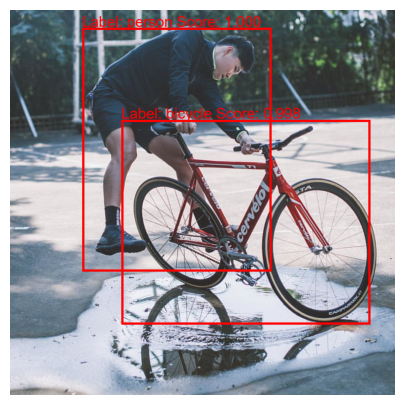

In [7]:
from PIL import Image, ImageDraw, ImageFont

# Extract from predictions
boxes = prediction[0]['boxes']
labels = prediction[0]['labels']
scores = prediction[0]['scores']

# Filter out parameters based on score
detect_threshold = 0.75
idx = torch.where(scores > detect_threshold)

boxes = boxes[idx]
labels = labels[idx]
scores = scores[idx]

# Convert PyTorch tensor to PIL Image  and draw results
img_np = img.permute(1, 2, 0).numpy() # Change from (C, H, W) to (H, W, C) as numpy array
img_pil = Image.fromarray(img_np) 

font = ImageFont.truetype("arial.ttf", size=40)
draw = ImageDraw.Draw(img_pil)

for box, label, score in zip(boxes, labels, scores):
    draw.rectangle(box.tolist(), outline='red', width=6)
    
    # Draw label and score text
    label = FasterRCNN_ResNet50_FPN_Weights.DEFAULT.meta["categories"][label]
    text = f"Label: {label} Score: {score.item():.3f}"
    draw.text((box[0], box[1] - 40), text, fill='red', font=font)

# Display results
plt.figure(figsize=(5,5))
plt.imshow(img_pil), plt.axis('off')
plt.show()

**Expected output**

```
Person: 1.000
Bicycle: 0.998
```

## Problem 3. Semantic Segmentation

Semantic segmentation is a computer vision task that involves classifying each pixel in an image into a predefined category. Unlike object detection, which identifies and localizes objects within bounding boxes, semantic segmentation assigns a class label to every pixel, providing a more detailed understanding of the image content. In this task, all instances of the same category are assigned the same label, meaning it does not differentiate between different instances of the same class (this is done in a different task called [Instance Segmentation](https://paperswithcode.com/task/instance-segmentation)).

**a)** Implement semantic segmentation on the `animals_2` image. To do so, use the `fcn_resnet50` with the default `FCN_ResNet50_Weights` pretrained weights. These weights were trained on a subset of [COCO](https://paperswithcode.com/dataset/coco), using only the 20 categories that are present in the [Pascal VOC dataset.](https://paperswithcode.com/dataset/pascal-voc) 

**Note.** The output of models like FCN_ResNet50 in PyTorch is not normalized, meaning it represents the raw scores (logits). Anyway, to get the final predicted class for each pixel, you can also take the argmax of the logits across the class dimension.

0.6%

Downloading: "https://download.pytorch.org/models/fcn_resnet50_coco-1167a1af.pth" to C:\Users\Ali Khan/.cache\torch\hub\checkpoints\fcn_resnet50_coco-1167a1af.pth


100.0%


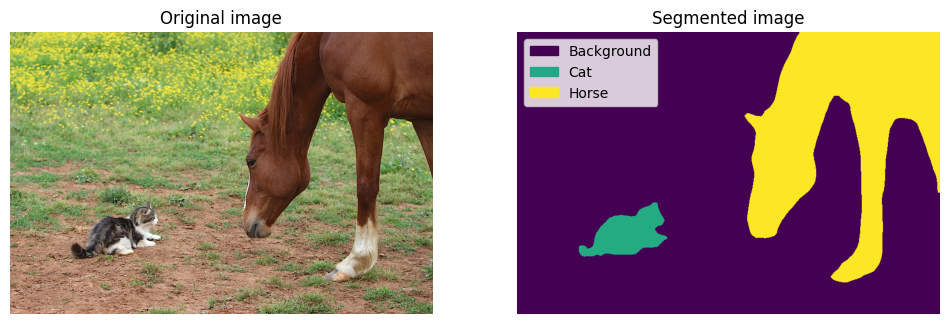

In [8]:
from torchvision.models.segmentation import fcn_resnet50, FCN_ResNet50_Weights
import matplotlib.patches as mpatches

# Load an image
image_path = "./images/images/animals_2.jpg"
img = read_image(image_path)

# Inference
prediction = compute_inference(image=img, 
                               arch=fcn_resnet50, 
                               weights=FCN_ResNet50_Weights.DEFAULT)

# Postprocess output
output = prediction['out'][0]
output_predictions = output.argmax(0).numpy()

# Find lables
idx = np.unique(output_predictions)
labels = [FCN_ResNet50_Weights.DEFAULT.meta["categories"][i] for i in idx]

# Create proxy artists for the legend
blue_patch = mpatches.Patch(color='#440154FF', label='Background')
green_patch = mpatches.Patch(color='#22A884FF', label='Cat')
red_patch = mpatches.Patch(color='#FDE725FF', label='Horse')

# Display results
img_np = img.permute(1, 2, 0).numpy() # Change from (C, H, W) to (H, W, C) as numpy array

plt.figure(figsize=(12,20))
plt.subplot(121), plt.imshow(img_np), plt.title('Original image'), plt.axis('off')
plt.subplot(122), plt.imshow(output_predictions, cmap='viridis'), plt.title('Segmented image'), plt.axis('off')
plt.legend(handles=[blue_patch, green_patch, red_patch], loc='upper left')
plt.show()

**b)** Evaluate the shape of the output. What does the dimensions represent?

In [10]:
# Print the output shape
out_shape = output.shape

print("Output shape: %s" % str(out_shape))

Output shape: torch.Size([21, 520, 779])


**Expected output**

```
Output shape: (21, 520, 779)
```

**Answer here**

## Problem 4. Pose Estimation

Pose estimation focuses on identifying and locating key points of a person's body, such as joints and limbs, within an image. This involves detecting the position of various body parts and understanding their spatial relationships to infer the posture of the person. For example, a pose estimation model can identify the positions of the head, shoulders, elbows, wrists, hips, knees, and ankles to map out the skeleton of a person in an image, which is useful in applications like motion capture, sports analysis, and human-computer interaction.

**a)** Run inference on the `people` image in order to estimate the pose of the people in the image. Utilize the `keypointrcnn_resnet50_fpn` architecture with the `KeypointRCNN_ResNet50_FPN_Weights.COCO_LEGACY` weights. Show the `prediction` dictionary and comment the results. What do you think each dict key represent?

In [9]:
from torchvision.models.detection import keypointrcnn_resnet50_fpn
from torchvision.models.detection.keypoint_rcnn import KeypointRCNN_ResNet50_FPN_Weights

# Define COCO keypoint connections
connect_skeleton = [
    (0, 1), (0, 2), (1, 3), (2, 4), (0, 5), (0, 6), (5, 7), (6, 8),
    (7, 9), (8, 10), (5, 11), (6, 12), (11, 13), (12, 14), (13, 15), (14, 16)
]

# Load a grayscale image
image_path = "./images/images/people.jpg"
img = read_image(image_path)

# Inference
prediction = compute_inference(image=img, 
                               arch=keypointrcnn_resnet50_fpn, 
                               weights=KeypointRCNN_ResNet50_FPN_Weights.COCO_LEGACY)

print("Dict keys: %s" % prediction[0].keys())
print("Scores: %s " % prediction[0]['scores'])
print("Bounding boxes: %s" % prediction[0]['boxes'])
print("Labels: %s" % prediction[0]['labels'])
print("Keypoints (first prediction): %s" % prediction[0]['keypoints'][0])
print("Keypoint score (first prediction): %s" % prediction[0]['keypoints_scores'][0])

Downloading: "https://download.pytorch.org/models/keypointrcnn_resnet50_fpn_coco-9f466800.pth" to C:\Users\Ali Khan/.cache\torch\hub\checkpoints\keypointrcnn_resnet50_fpn_coco-9f466800.pth


100.0%


Dict keys: dict_keys(['boxes', 'labels', 'scores', 'keypoints', 'keypoints_scores'])
Scores: tensor([0.9997, 0.9994, 0.0622]) 
Bounding boxes: tensor([[184.6035,  97.8593, 370.9555, 463.3753],
        [349.9025,  84.8331, 522.5648, 461.7412],
        [602.6135, 300.1204, 680.4720, 420.9370]])
Labels: tensor([1, 1, 1])
Keypoints (first prediction): tensor([[218.1832, 130.7859,   1.0000],
        [226.6537, 124.1402,   1.0000],
        [215.1580, 124.1402,   1.0000],
        [244.1998, 130.1818,   1.0000],
        [212.1328, 130.1818,   1.0000],
        [268.4014, 169.4521,   1.0000],
        [204.2673, 174.8895,   1.0000],
        [307.1239, 208.7224,   1.0000],
        [198.2169, 234.7012,   1.0000],
        [344.6364, 243.1595,   1.0000],
        [193.3766, 286.0547,   1.0000],
        [259.9308, 260.6801,   1.0000],
        [217.5781, 262.4925,   1.0000],
        [258.7208, 346.4706,   1.0000],
        [222.4184, 352.5122,   1.0000],
        [257.5107, 428.0320,   1.0000],
        [2

**Expected output**

```
Dict keys: boxes, labels, scores, keypoints, keypoints_scores

Scores: [0.9997, 0.9994, 0.0622]
Boxes: [[184.6035,  97.8593, 370.9556, 463.3753],
        [349.9025,  84.8331, 522.5648, 461.7413],
        [602.6135, 300.1205, 680.4720, 420.9370]]
Labels: [1, 1, 1]
Keypoints (first prediction): [[218.1832, 130.7859,   1.0000],
        [226.6537, 124.1402,   1.0000],
        [215.1580, 124.1402,   1.0000],
        [244.1999, 130.1818,   1.0000],
        [212.1328, 130.1818,   1.0000],
        [268.4014, 169.4521,   1.0000],
        [204.2673, 174.8895,   1.0000],
        [307.1239, 208.7224,   1.0000],
        [198.2169, 234.7012,   1.0000],
        [344.6364, 243.1595,   1.0000],
        [193.3766, 286.0547,   1.0000],
        [259.9309, 260.6801,   1.0000],
        [217.5781, 262.4925,   1.0000],
        [258.7208, 346.4706,   1.0000],
        [222.4184, 352.5122,   1.0000],
        [257.5107, 428.0320,   1.0000],
        [227.2588, 429.8445,   1.0000]]
Keypoint score (first prediction): [15.1136, 16.5222, 14.7795, 15.4961,  7.0639,  9.2599,  8.9105, 10.4682,
         9.8791,  8.2200, 10.8254,  9.2769,  9.1045,  8.9196,  9.4337,  8.7822, 9.7630]
```

Should I define the key or what the numbers are representing?

The dictionary gives the models full detection output:

- where each object is (boxes)

- what it is (labels)

- how sure the model is (scores)


In the given scores we can se the for the first two the model is highly confident.


**b)** Use the previous predictions to draw the keypoints and the connections of those detected people with a score higher than 0.75. To do so, tilize the `draw_keypoints` function ([Documentation](https://pytorch.org/vision/main/generated/torchvision.utils.draw_keypoints.html)).

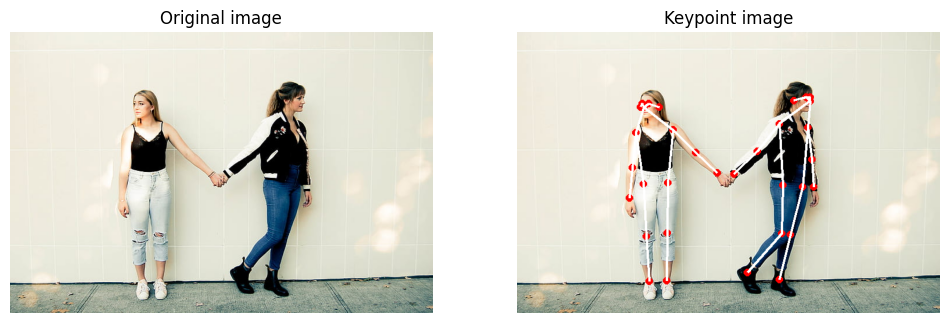

In [11]:
from torchvision.utils import draw_keypoints

# Extract keypoints and scores from predictions
keypoints = prediction[0]['keypoints']
scores = prediction[0]['scores']

# Filter out keypoints based on score
detect_threshold = 0.75
idx = torch.where(scores > detect_threshold)
keypoints = keypoints[idx][..., :2] 

# Draw keypoints and skeleton (connections).
draw = draw_keypoints(image=img,
                      keypoints=keypoints,
                      connectivity=connect_skeleton,
                      colors="red", radius=6, width=4)

# Display results
img_np = img.permute(1, 2, 0).numpy()
draw_np = draw.permute(1, 2, 0).numpy()
plt.figure(figsize=(12,20))
plt.subplot(121), plt.imshow(img_np), plt.title('Original image'), plt.axis('off')
plt.subplot(122), plt.imshow(draw_np), plt.title('Keypoint image'), plt.axis('off')
plt.show()

## Contact
### Course teacher
Professor Kjersti Engan, room E-431,
E-mail: kjersti.engan@uis.no

### Teaching assistant
Md Sazidur Rahman, room E-401
E-mail: md.s.rahman@uis.no